In [1]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [8]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [11]:
content_image = load_image('Datasets\\Neural_style_tranfer_dataset\\cillian_murphy.jpg')
style_image = load_image('Datasets\\Neural_style_tranfer_dataset\\styled_image.jpeg')

In [12]:
content_image.shape

TensorShape([1, 657, 763, 3])

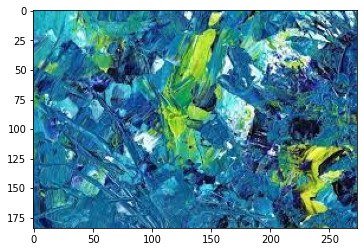

In [13]:
plt.imshow(np.squeeze(style_image))
plt.show()


In [14]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

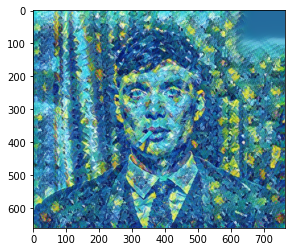

In [15]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [16]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))


True